<a href="https://colab.research.google.com/github/heishi1HUMANITY/machine_learning_practice/blob/master/patient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prediction:  [13921.56781078]


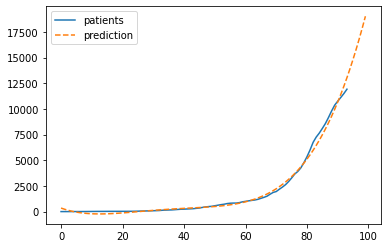

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データの読み込み
data = pd.read_csv('https://raw.githubusercontent.com/heishi1HUMANITY/machine_learning_practice/master/patient.csv')
train_x = np.arange(len(data))
train_y = np.array(data['total_confirmed_cases'])

# 標準化
mu = train_x.mean()
sigma = train_x.std()
standardize = lambda x: (x - mu) / sigma
train_z = standardize(train_x)

# パラメータの初期化
np.random.seed(seed=0)
theta = np.random.rand(5)

# データの行列を作成
to_matrix = lambda x: np.vstack([np.ones(x.shape[0]), x, x ** 2, x ** 3, x**4]).T
X = to_matrix(train_z)

# 予測関数
f = lambda x: np.dot(x, theta)
# 平均二乗誤差
MSE = lambda x, y: (1 / x.shape[0]) * np.sum((y - f(X)) ** 2)

# 学習率
ETA = 1e-3
# 誤差の差分
diff = 1
# 学習
errors = [MSE(X, train_y)]
while diff > 1e-2:
    # 確率的勾配降下法
    p = np.random.permutation(X.shape[0])
    for x, y in zip(X[p,:], train_y[p]):
        theta = theta - ETA * (f(x)- y) * x
    # # 最急降下法
    # theta = theta - ETA * np.dot(f(X) - train_y, X)
    errors.append(MSE(X, train_y))
    diff = errors[-2] - errors[-1]    

print('prediction: ', f(to_matrix(np.array([standardize(len(data))]))))
x = np.linspace(0, len(data) + 5, 100)
plt.plot(train_x, train_y, label='patients')
plt.plot(x, f(to_matrix(standardize(x))), label='prediction', linestyle='dashed')
plt.legend(loc='best')
plt.show()